In [1]:
import pandas as pd
surveydata = pd.read_excel(r'/Users/jacobyang/Downloads/Externship data/Externship attendance data/UES Externship Interest Form (Responses).xlsx', index_col=0)


In [2]:
surveydata.head()

,Email Address,"What is your name? (First and Last, ex: Bob Smith)",What is your UCSD email?,What year are you?,Are you a transfer student?,What is your major?,How did you hear about us?,Questions/Concerns?
Timestamp,,,,,,,,
2022-09-19 08:59:26.607,loza.ilker@gmail.com,Ilker loza,Ilozahernandez@ucsd.edu,Junior,Yes,CS/Math-CS/ECE/Engineering,Table,NaN
2022-09-19 09:13:59.602,stellogalindo@ucsd.edu,Sebastien Tello,stellogalindo@ucsd.edu,Freshman,No,Business Economics,Instagram,Na
2022-09-19 10:05:16.428,gtxu@ucsd.edu,Grace Xu,gtxu@ucsd.edu,Sophomore,No,Economics,Table,NaN
2022-09-19 10:18:43.899,sertommus@gmail.com,Thomas Zhang,tyz002@ucsd.edu,Freshman,No,Economics,Table,NaN
2022-09-19 10:20:36.116,avt001@ucsd.edu,Vivian Tran,avt001@ucsd.edu,Sophomore,No,Joint Math-Econ,Discord,NaN


In [3]:
import matplotlib.pyplot as plt


In [4]:
year = surveydata["What year are you?"].value_counts().sort_index()
#surveydata = surveydata.replace('Junior Year Exchange Student', 'Junior', regex = True)

year
#x_values = year.index
#y_values = 

Freshman                        71
Junior                          47
Junior Year Exchange Student     1
Second year, junior standing     1
Senior                          27
Sophomore                       59
j u n i o r                      1
transfer                         1
Name: What year are you?, dtype: int64

In [5]:
data = {
    'Year': ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Junior Year Exchange Student', 'Second year, junior standing', 'j u n i o r', 'transfer'],
    'Count': [71, 59, 47, 27, 1, 1, 1, 1]
}
df = pd.DataFrame(data)
order = ['Freshman', 'Sophomore', 'Junior', 'Senior', 'Junior Year Exchange Student', 'Second year, junior standing', 'j u n i o r', 'transfer']


In [6]:
df

,Year,Count
0,Freshman,71
1,Sophomore,59
2,Junior,47
3,Senior,27
4,Junior Year Exchange Student,1
5,"Second year, junior standing",1
6,j u n i o r,1
7,transfer,1


In [7]:
df.loc[df['Year'].isin(['Junior Year Exchange Student', 'Junior']), 'Year'] = 'Junior'
df.loc[df['Year'].isin(['Second year, junior standing', 'Sophomore']), 'Year'] = 'Sophomore'
df.loc[df['Year'].isin(['j u n i o r', 'Junior']), 'Year'] = 'Junior'
df.loc[df['Year'].isin(['transfer', 'Junior']), 'Year'] = 'Junior'
df = df.groupby('Year').sum().reset_index()

df

,Year,Count
0,Freshman,71
1,Junior,50
2,Senior,27
3,Sophomore,60


In [8]:
df = df.sort_values('Year')
df

,Year,Count
0,Freshman,71
1,Junior,50
2,Senior,27
3,Sophomore,60


In [9]:
df['Year'] = pd.Categorical(df['Year'], categories=order, ordered=True)
df = df.sort_values('Year')
df

,Year,Count
0,Freshman,71
3,Sophomore,60
1,Junior,50
2,Senior,27


Text(0.5, 1.0, 'Student Year Distribution')

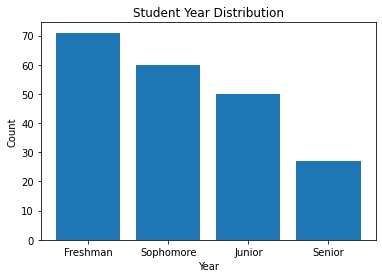

In [10]:
df = df.sort_values('Year')

# Create the bar graph
plt.bar(df['Year'], df['Count'])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Student Year Distribution')

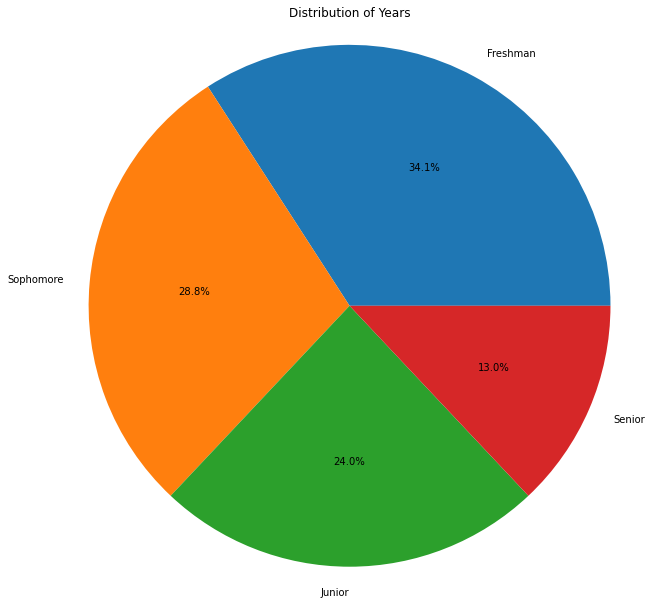

In [22]:
plt.pie(df['Count'], labels=df['Year'], autopct='%1.1f%%',radius = 3)

# Add a title
plt.title('Distribution of Years', pad = 180)

# Display the chart
plt.show()

In [11]:
major = surveydata["What is your major?"].value_counts()
major = pd.DataFrame({'Major': major.index, 'Count': major.values})
major


,Major,Count
0,Business Economics,80
1,Economics,56
2,Joint Math-Econ,26
3,CS/Math-CS/ECE/Engineering,9
4,International Business / Studies,9
5,Other,9
6,Management Science,5
7,Math,4
8,"Economics, CS/Math-CS/ECE/Engineering",2
9,"Economics, Economics - Public Policy",1


In [12]:
major.loc[major['Major'].isin(['Business Economics, Other', 'Business Economics']), 'Major'] = 'Business Economics'
major.loc[major['Major'].isin(['Economics, Other', 'Economics']), 'Major'] = 'Economics'
major.loc[major['Major'].isin(['Joint Math-Econ, Other', 'Joint Math-Econ']), 'Major'] = 'Joint Math-Econ'
major.loc[major['Major'].isin(['International Business / Studies, Other', 'International Business / Studies']), 'Major'] = 'International Business / Studies'
major.loc[major['Major'].isin(['Math, CS/Math-CS/ECE/Engineering', 'CS/Math-CS/ECE/Engineering']), 'Major'] = 'CS/Math-CS/ECE/Engineering'

major = major.groupby('Major').sum().reset_index().sort_values('Count', ascending = False)

major



,Major,Count
0,Business Economics,81
3,Economics,57
8,Joint Math-Econ,27
2,CS/Math-CS/ECE/Engineering,10
7,International Business / Studies,10
11,Other,9
9,Management Science,5
10,Math,4
4,"Economics, CS/Math-CS/ECE/Engineering",2
1,"Business Economics, International Business / S...",1


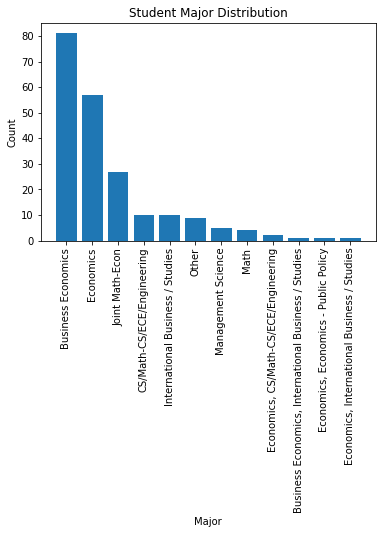

In [21]:


plt.bar(major['Major'], major['Count'])

# Add labels and title
plt.xlabel('Major')
plt.ylabel('Count')
plt.title('Student Major Distribution')
plt.xticks(rotation=90)
plt.show()

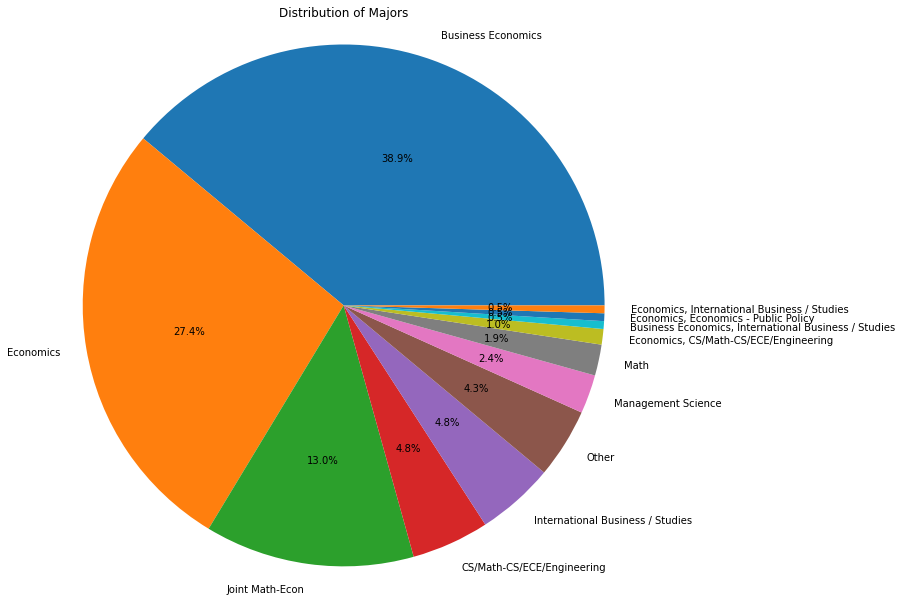

In [14]:
plt.pie(major['Count'], labels=major['Major'], autopct='%1.1f%%',radius = 3)

# Add a title
plt.title('Distribution of Majors', pad = 180)

# Display the chart
plt.show()

In [15]:
hear = surveydata["How did you hear about us?"].value_counts()
hear_df = pd.DataFrame({'Source': hear.index, 'Count': hear.values})
hear_df


,Source,Count
0,Table,69
1,Discord,38
2,Word of Mouth,32
3,Instagram,26
4,Website,22
5,Flyers,11
6,the wishing well,1
7,Returning,1
8,i was in ues last year,1
9,I am a returning member,1


In [16]:
hear_df.loc[hear_df['Source'].isin(['Returning', 'Returning member']), 'Source'] = 'Returning member'
hear_df.loc[hear_df['Source'].isin(['i was in ues last year', 'Returning member']), 'Source'] = 'Returning member'
hear_df.loc[hear_df['Source'].isin(['i am a returning member', 'Returning member']), 'Source'] = 'Returning member'
hear_df.loc[hear_df['Source'].isin(['I am a returning member', 'Returning member']), 'Source'] = 'Returning member'

hear_df.loc[hear_df['Source'].isin(['Zachary Gee', 'Friend']), 'Source'] = 'Friend'



hear_df = hear_df.groupby('Source').sum().reset_index().sort_values('Count', ascending = False)

hear_df

,Source,Count
8,Table,69
0,Discord,38
10,Word of Mouth,32
5,Instagram,26
9,Website,22
3,Flyers,11
7,Returning member,4
4,Friend,2
1,Econference (last year),1
2,Facebook,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

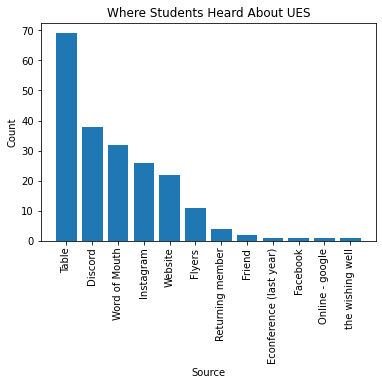

In [17]:
plt.bar(hear_df['Source'], hear_df['Count'])

# Add labels and title
plt.xlabel('Source')
plt.ylabel('Count')
plt.title('Where Students Heard About UES')
plt.xticks(rotation=90)


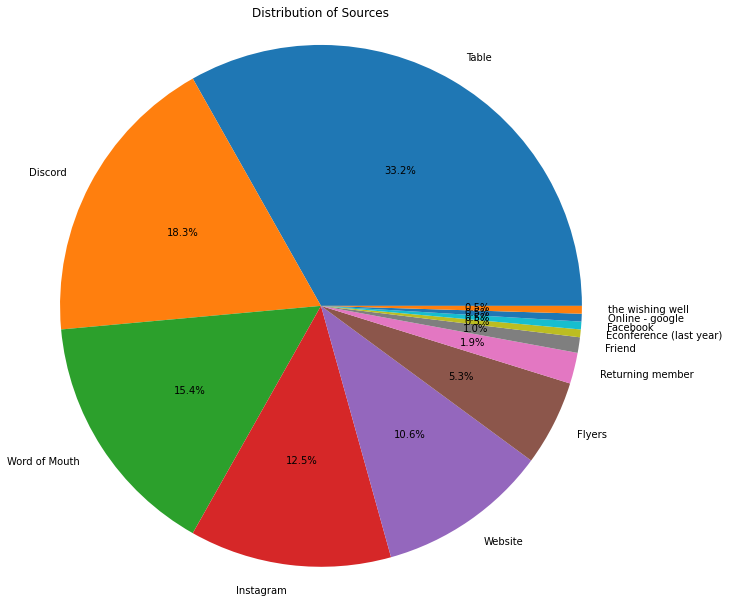

In [18]:
plt.pie(hear_df['Count'], labels=hear_df['Source'], autopct='%1.1f%%',radius = 3)

# Add a title
plt.title('Distribution of Sources', pad = 180)

# Display the chart
plt.show()